In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [56]:
df=pd.read_csv('train_storming_round.csv')
df['agent_join_month']=pd.to_datetime(df['agent_join_month'])
df['year_month']=pd.to_datetime(df['year_month'])
df['first_policy_sold_month']=pd.to_datetime(df['first_policy_sold_month'])
df

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2021-02-01,2023-09-01,2023-01-01,3,6,2,12,...,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,2022-04-01,2024-02-01,2023-01-01,1,4,12,21,...,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,2020-05-01,2023-09-01,2023-01-01,3,5,5,17,...,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,2019-07-01,2022-03-01,2023-01-01,1,0,12,17,...,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,2020-09-01,2023-02-01,2023-01-01,0,6,10,17,...,13,3,10,6,19,20,1957680,562239,19,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,15304,d3b44e44,43,2019-04-01,2023-10-01,2024-08-01,1,6,6,17,...,10,3,4,11,18,25,2473900,404980,18,100
15304,15305,0b1d7054,28,2022-09-01,2024-03-01,2024-08-01,1,5,3,13,...,14,4,3,11,18,15,922050,198187,18,120
15305,15306,51321fa2,45,2021-01-01,2024-04-01,2024-08-01,0,6,17,26,...,22,6,7,6,19,30,645330,133263,57,270
15306,15307,dd4a0d2d,25,2021-12-01,2023-12-01,2024-08-01,0,4,6,14,...,13,6,3,6,15,0,0,32546,30,171


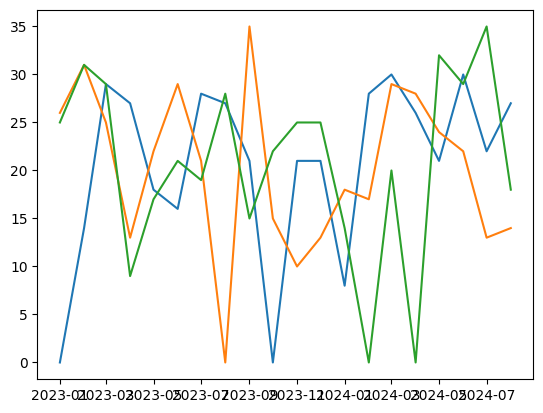

In [57]:
plt.plot(df[df['agent_code']=='455ca878']['year_month'],df[df['agent_code']=='455ca878']['new_policy_count'])
plt.plot(df[df['agent_code']=='62154055']['year_month'],df[df['agent_code']=='62154055']['new_policy_count'])
plt.plot(df[df['agent_code']=='c823ce77']['year_month'],df[df['agent_code']=='c823ce77']['new_policy_count'])
plt.show()

In [58]:
df['training_experience']=(df['year_month']-df['agent_join_month']).dt.days
df['practical_experience']=(df['year_month']-df['first_policy_sold_month']).dt.days
df['agent_nill_next_month'] = (df.groupby('agent_code')['new_policy_count'].shift(-1) != 0).astype(int)
df=df[~(df['year_month']=='2024-08-01	')]
df

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,training_experience,practical_experience,agent_nill_next_month
0,1,455ca878,45,2021-02-01,2023-09-01,2023-01-01,3,6,2,12,...,8,15,0,0,93313,30,162,699,-243,1
1,2,c823ce77,48,2022-04-01,2024-02-01,2023-01-01,1,4,12,21,...,10,17,25,1071450,164804,0,175,275,-396,1
2,3,62154055,53,2020-05-01,2023-09-01,2023-01-01,3,5,5,17,...,11,21,26,1601210,426690,84,78,975,-243,1
3,4,c58bfa6e,44,2019-07-01,2022-03-01,2023-01-01,1,0,12,17,...,9,13,18,283230,47793,39,144,1280,306,1
4,5,b1e5f770,20,2020-09-01,2023-02-01,2023-01-01,0,6,10,17,...,6,19,20,1957680,562239,19,40,852,-31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14398,14399,08a278cd,42,2023-08-01,2024-01-01,2024-07-01,0,1,15,21,...,9,19,27,2644407,612572,19,135,335,182,1
14399,14400,272f6f80,25,2024-06-01,2024-04-01,2024-07-01,3,5,20,29,...,11,17,31,984932,128415,34,62,30,91,1
14400,14401,817339ac,53,2020-02-01,2023-12-01,2024-07-01,1,1,17,24,...,0,6,26,1515410,244054,24,78,1612,213,1
14401,14402,026b60ee,57,2019-08-01,2022-03-01,2024-07-01,1,0,16,19,...,9,15,23,2132514,229389,30,0,1796,853,1


In [59]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
def scale_dataset(df,oversample):
    df=df.drop([
'unique_proposals_last_7_days',
'unique_proposals_last_15_days',
'unique_proposals_last_21_days',
'unique_quotations_last_7_days',
'unique_quotations_last_15_days',
'unique_quotations_last_21_days',
'unique_customers_last_7_days',
'unique_customers_last_15_days',
'unique_customers_last_21_days'],axis=1)
    x=df[df.columns[6:-1]].values
    y=df['agent_nill_next_month'].values
    if oversample:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)
    return x,y

In [60]:
train_x,train_y=scale_dataset(df,True)

In [61]:
df=pd.read_csv('test_storming_round.csv')
df['agent_join_month']=pd.to_datetime(df['agent_join_month'])
df['year_month']=pd.to_datetime(df['year_month'])
df['first_policy_sold_month']=pd.to_datetime(df['first_policy_sold_month'])
df['training_experience']=(df['year_month']-df['agent_join_month']).dt.days
df['practical_experience']=(df['year_month']-df['first_policy_sold_month']).dt.days
df['agent_nill_next_month'] = (df.groupby('agent_code')['new_policy_count'].shift(-1) == 0).astype(int)
df

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies,training_experience,practical_experience,agent_nill_next_month
0,1,de9a845f,43,2020-06-01,2022-04-01,2024-09-01,0,2,12,17,...,5,20,24,511320,86955,0,48,1553,884,0
1,2,1450745b,32,2019-05-01,2022-08-01,2024-09-01,1,3,4,13,...,5,9,14,296660,55062,9,56,1950,762,0
2,3,5c4dd08c,52,2019-06-01,2022-06-01,2024-09-01,2,6,17,27,...,10,21,34,833544,224429,0,34,1919,823,0
3,4,3c7a8b50,21,2021-05-01,2023-09-01,2024-09-01,1,6,17,26,...,10,15,33,2972409,439159,15,33,1219,366,0
4,5,3dd0c2a1,33,2022-09-01,2023-11-01,2024-09-01,0,4,2,8,...,6,15,15,168150,18195,60,90,731,305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,910,8f77f8e4,55,2020-05-01,2022-01-01,2024-09-01,2,1,11,16,...,7,14,21,1143954,313127,14,21,1584,974,0
910,911,a199082b,60,2021-10-01,2022-11-01,2024-09-01,2,1,15,21,...,2,8,26,2169310,267832,8,78,1066,670,0
911,912,9c2e3be7,45,2022-07-01,2023-07-01,2024-09-01,3,5,14,27,...,10,15,34,1980194,449309,60,238,793,428,0
912,913,89cb3dd5,23,2021-05-01,2023-06-01,2024-09-01,3,5,7,19,...,3,13,28,2489004,462418,13,56,1219,458,0


In [62]:
test_x,test_y=scale_dataset(df,False)

In [63]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(train_x,train_y)
predict_y=model.predict(test_x)

In [64]:
df = pd.DataFrame({
    'row_id': np.arange(1, len(predict_y) + 1),
    'target_column': predict_y
})

# Save to CSV
df.to_csv('sample_submission_storming_round.csv', index=False)

In [65]:
from xgboost import XGBClassifier
model=XGBClassifier(n_estimators=200,random_state=42)
model.fit(train_x,train_y)
predict_y=model.predict(test_x)